Preparar o arquivo eliminando as ultimas 7 linhas

Função Main 

Acurácias de cada fold: [0.4166666666666667, 0.3611111111111111, 0.42592592592592593, 0.4722222222222222, 0.5185185185185185]
Acuracia Media0.43888888888888894


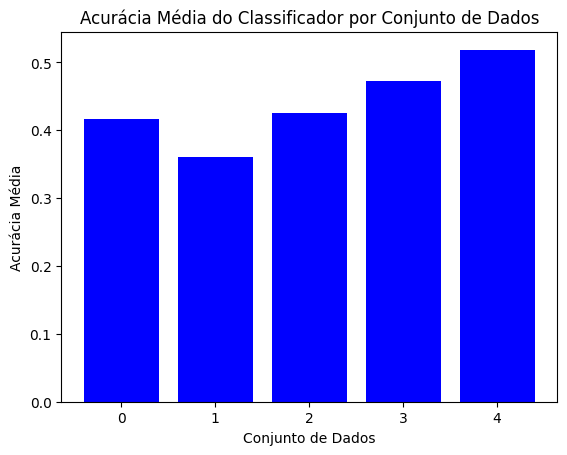

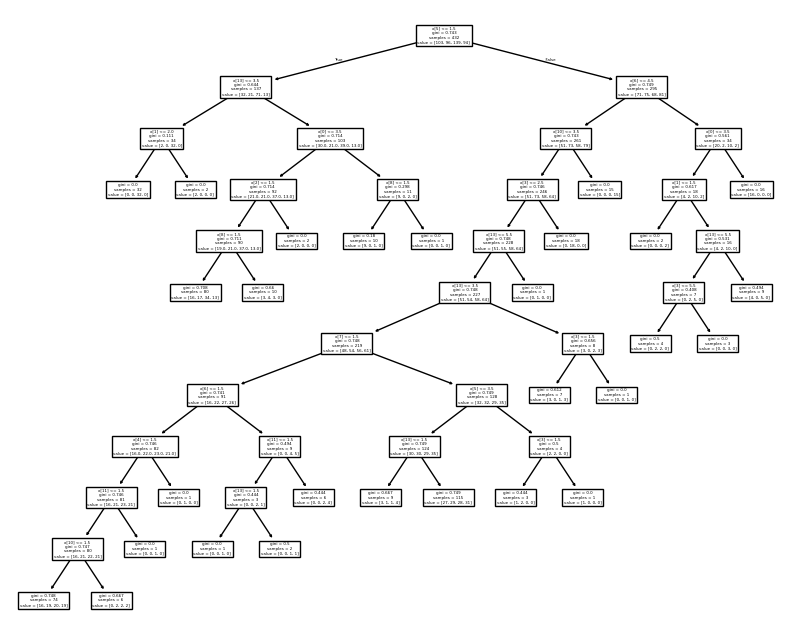

In [32]:
import pandas as pd  # Importação do pandas
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split  # Importação do train_test_split
import matplotlib.pyplot as plt  # Importação do matplotlib
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split , KFold, cross_val_score # usar este ou
from sklearn import model_selection  # este ? olhar o video do professor aula 2 começo do video 14:00
import numpy as np
from sklearn.preprocessing import StandardScaler


def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    
    return df

# Carrega e prepara os dados
df = load_and_prepare_data('Deepression.csv')
#print(df.head(3))


X = df.drop(columns=['Number','Depression State'])
y = df['Depression State'] 

    
# depression ultima coluna
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


accuracies = []

# separar os itens de treino ---------------

decidion_tree = tree.DecisionTreeClassifier()



kf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X, y_encoded):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    
   
    # Treinar o modelo
    decidion_tree.fit(X_train, y_train)
    
  
    # Avaliar a precisão do modelo
    accuracy = decidion_tree.score(X_test, y_test)
    accuracies.append(accuracy)

print(f"Acurácias de cada fold: {accuracies}")
mean_accuracy = np.mean(accuracies)
print(f"Acuracia Media{mean_accuracy}")





num_datasets = len(accuracies)
x_positions = np.arange(num_datasets)
plt.bar(x_positions, accuracies, color='blue')
plt.xticks(x_positions)
plt.xlabel('Conjunto de Dados')
plt.ylabel('Acurácia Média')
plt.title('Acurácia Média do Classificador por Conjunto de Dados')
plt.show()


fig, ax = plt.subplots(figsize=(10,8))

tree.plot_tree(decidion_tree)

plt.show()